# Challenge Description

In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

…ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you? 

<img src="imgs/header.png" width="800" />

…it's not just a guess drawn out of the hat. There is an algorithm behind it.

With this context, EDSA challenged us to construct a `recommendation algorithm` based on `content` or `collaborative filtering`, capable of accurately predicting how a user will `rate` a movie they have not yet viewed based on their historical preferences.

**What value is achieved through building a functional recommender system?**

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.
<img src="imgs/recommendation-system.webp" width="600" />


# Dataset Description
### Data Overview

This dataset consists of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems, and now you get to as well!

For this Predict, we'll be using a special version of the MovieLens dataset which has enriched with additional data, and resampled for fair evaluation purposes. 

### Source

The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

### Supplied Files

- genome_scores.csv - a score mapping the strength between movies and tag-related properties.
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- sample_submission.csv - Sample of the submission format for the hackathon.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Loading Comet & Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Conclusion</a>

 <a id="one"></a>
### 1. Connecting Comet
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Comet ⚡ |
| :--------------------------- |
| In this section we will import, and briefly discuss, the libraries that will be used to save the notebook version in comet. |

###  Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we will import, and briefly discuss, the libraries that will be used throughout the project for analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import cufflinks as cf

#Time libraries
import time

# Libraries for data preparation
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Libraries for modeling


#cell warnings
import warnings
warnings.filterwarnings("ignore")

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we load the data from the csv files into DataFrames and show a preview of the data within the files. |

---

In [3]:
genome_scores = pd.read_csv("genome_scores.csv")
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [4]:
genome_tags = pd.read_csv("genome_tags.csv")
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [5]:
imdb_data = pd.read_csv("imdb_data.csv")
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
links = pd.read_csv("links.csv")
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
tags = pd.read_csv("tags.csv")
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [9]:
test = pd.read_csv("test.csv")
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
train = pd.read_csv("train.csv")
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


- After loading the data and previewing it's contents, we can see that the files include 2 or more columns with the most common column being "movieId" except for the "genome_tags" file which consists of the "tagId" and "tags" columns.

Let us take you through more analysis on the next section.

<a id="three"></a>
### 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, we perform an in-depth analysis of all the variables in the DataFrames we previously loaded. |

---


- First let's see the shape of the data. (rows, columns)

In [19]:
print(f"Genome scores dataset: {genome_scores.shape} \n Genome tags dataset: {genome_tags.shape} \n IMDB dataset: {imdb_data.shape} \n Links dataset: {links.shape} \n Movies dataset: {movies.shape} \n Tags dataset: {tags.shape} \n Test dataset: {test.shape} \n Train dataset: {train.shape}") 

Genome scores dataset: (15584448, 3) 
 Genome tags dataset: (1128, 2) 
 IMDB dataset: (27278, 6) 
 Links dataset: (62423, 3) 
 Movies dataset: (62423, 3) 
 Tags dataset: (1093360, 4) 
 Test dataset: (5000019, 2) 
 Train dataset: (10000038, 4)


Check if the datasets have any missing values.

In [22]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [23]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [24]:
imdb_data.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [25]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [26]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [27]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [28]:
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [29]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

- checking for null/missing values we can see that some datasets have no null values and some have. The IMDB_data dataset has columns with a number of null values and the Links and Tags datasets have one column with null values.

- Let's merge some datasets into one entity.

In [32]:
#merging the movies and imdb datasets into one
imdb_movies = pd.merge(movies, imdb_data, on= "movieId")

#merging the imdb_movies dataset with the tags dataset
movie_tags = pd.merge(imdb_movies, tags, on= "movieId")


In [37]:
#merging the train dataset
df_train = movies.merge(train, on= "movieId")
df_train.drop(columns = ["timestamp"], inplace = True)

In [38]:
df_train.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0


In [40]:
#merging train and imdb datasets
imdb_train = pd.merge(imdb_data, train, on= "movieId")
imdb_train.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,userId,rating,timestamp
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,158849,5.0,994716786
1,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,97203,5.0,942683155
2,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,161871,3.0,833104576
3,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,45117,4.0,1442256969
4,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,27431,5.0,849667827


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000038 entries, 0 to 10000037
Data columns (total 5 columns):
 #   Column   Dtype  
---  ------   -----  
 0   movieId  int64  
 1   title    object 
 2   genres   object 
 3   userId   int64  
 4   rating   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 457.8+ MB


In [45]:
df_train.describe()

,movieId,userId,rating
count,1.000004e+07,1.000004e+07,1.000004e+07
mean,2.138911e+04,8.119909e+04,3.533395e+00
std,3.919578e+04,4.679359e+04,1.061124e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,1.197000e+03,4.051000e+04,3.000000e+00
50%,2.947000e+03,8.091400e+04,3.500000e+00
75%,8.630000e+03,1.215790e+05,4.000000e+00
max,2.091710e+05,1.625410e+05,5.000000e+00


In [46]:
imdb_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9633031 entries, 0 to 9633030
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   movieId        int64  
 1   title_cast     object 
 2   director       object 
 3   runtime        float64
 4   budget         object 
 5   plot_keywords  object 
 6   userId         int64  
 7   rating         float64
 8   timestamp      int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 734.9+ MB


In [47]:
imdb_train.describe()

,movieId,runtime,userId,rating,timestamp
count,9.633031e+06,6.979973e+06,9.633031e+06,9.633031e+06,9.633031e+06
mean,1.628712e+04,1.160965e+02,8.124516e+04,3.534708e+00,1.204205e+09
std,2.939986e+04,2.409290e+01,4.680182e+04,1.060377e+00,2.231643e+08
min,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.136000e+03,1.000000e+02,4.054500e+04,3.000000e+00,1.004634e+09
50%,2.762000e+03,1.130000e+02,8.097400e+04,3.500000e+00,1.181530e+09
75%,7.099000e+03,1.280000e+02,1.216250e+05,4.000000e+00,1.437667e+09
max,1.312620e+05,8.770000e+02,1.625410e+05,5.000000e+00,1.574327e+09


Average rating: 3.534708182710094


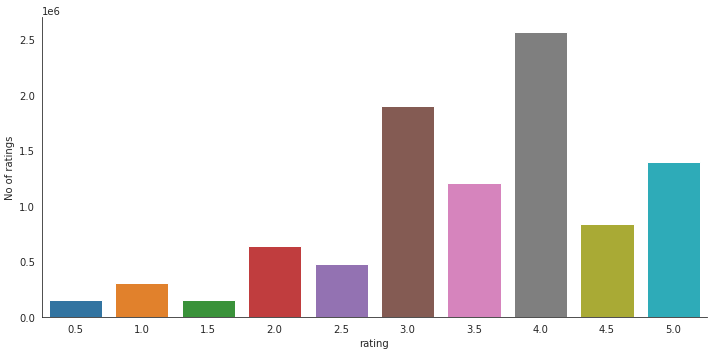

In [52]:
#Looking at how values are distributed in the merged dataset.
with sns.axes_style("white"): 
    rates = sns.factorplot("rating", data = imdb_train, aspect = 2.0, kind = "count")
    rates.set_ylabels("No of ratings")

print (f'Average rating: {np.mean(imdb_train["rating"])}')

<a id="four"></a>
### 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
### 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modeling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more unsupervised models that are able to accurately predict how a user will  rate a movie they have not viewed based on historical preferences. |

---

<a id="six"></a>
### 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models and comment on what model is the best and why. |

---

 <a id="seven"></a>
### 1. Conclusion
<a href=#cont>Back to Table of Contents</a>